<a href="https://colab.research.google.com/github/LuisAngelOlveraOlvera/Hands-On-Data-Analysis-with-Pandas-Second-Edition/blob/main/Chapter_2_Working_with_Pandas_DataFrames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

example_data = "https://github.com/LuisAngelOlveraOlvera/Hands-On-Data-Analysis-with-Pandas-Second-Edition/blob/main/example_data.csv?raw=True"

data = np.genfromtxt(example_data, delimiter=';', names=True, dtype = None, encoding="UTF")
print(data)
print(data.shape)
print(data.dtype)

[('2018-10-13 11:10:23.560', '262km NW of Ozernovskiy, Russia', 'mww', 6.7, 'green', 1)
 ('2018-10-13 04:34:15.580', '25km E of Bitung, Indonesia', 'mww', 5.2, 'green', 0)
 ('2018-10-13 00:13:46.220', '42km WNW of Sola, Vanuatu', 'mww', 5.7, 'green', 0)
 ('2018-10-12 21:09:49.240', '13km E of Nueva Concepcion, Guatemala', 'mww', 5.7, 'green', 0)
 ('2018-10-12 02:52:03.620', '128km SE of Kimbe, Papua New Guinea', 'mww', 5.6, 'green', 1)]
(5,)
[('time', '<U23'), ('place', '<U37'), ('magType', '<U3'), ('mag', '<f8'), ('alert', '<U5'), ('tsunami', '<i8')]


In [2]:
%%timeit
max([row[3] for row in data])

The slowest run took 4.65 times longer than the fastest. This could mean that an intermediate result is being cached.
8.77 µs ± 5.06 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [3]:
array_dict = {
    col: np.array([row[col] for row in data])
    for col in data.dtype.names
}
print(array_dict)

{'time': array(['2018-10-13 11:10:23.560', '2018-10-13 04:34:15.580',
       '2018-10-13 00:13:46.220', '2018-10-12 21:09:49.240',
       '2018-10-12 02:52:03.620'], dtype='<U23'), 'place': array(['262km NW of Ozernovskiy, Russia', '25km E of Bitung, Indonesia',
       '42km WNW of Sola, Vanuatu',
       '13km E of Nueva Concepcion, Guatemala',
       '128km SE of Kimbe, Papua New Guinea'], dtype='<U37'), 'magType': array(['mww', 'mww', 'mww', 'mww', 'mww'], dtype='<U3'), 'mag': array([6.7, 5.2, 5.7, 5.7, 5.6]), 'alert': array(['green', 'green', 'green', 'green', 'green'], dtype='<U5'), 'tsunami': array([1, 0, 0, 0, 1])}


In [4]:
%%timeit
array_dict["mag"].max()

4.94 µs ± 757 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [5]:
np.array([
... value[array_dict['mag'].argmax()]
... for key, value in array_dict.items()
... ])

array(['2018-10-13 11:10:23.560', '262km NW of Ozernovskiy, Russia',
       'mww', '6.7', 'green', '1'], dtype='<U32')

In [6]:
import pandas as pd
# Series
place = pd.Series(array_dict['place'], name='place')
print(place)
print(place.name)
print(place.dtype)
print(place.shape)
print(place.index)
print(place.values)


0          262km NW of Ozernovskiy, Russia
1              25km E of Bitung, Indonesia
2                42km WNW of Sola, Vanuatu
3    13km E of Nueva Concepcion, Guatemala
4      128km SE of Kimbe, Papua New Guinea
Name: place, dtype: object
place
object
(5,)
RangeIndex(start=0, stop=5, step=1)
['262km NW of Ozernovskiy, Russia' '25km E of Bitung, Indonesia'
 '42km WNW of Sola, Vanuatu' '13km E of Nueva Concepcion, Guatemala'
 '128km SE of Kimbe, Papua New Guinea']


In [7]:
import pandas as pd

# Crear una lista de nombres de equipos de fútbol
lista = ["Arsenal", "Liverpool", "Chelsea"]

# Crear una serie de Pandas a partir de la lista
a = pd.Series(lista)

# Mostrar la serie
print(a)


0      Arsenal
1    Liverpool
2      Chelsea
dtype: object


In [8]:
#Index
import pandas as pd

# Crear una serie de ejemplo
s = pd.Series([1, 2, 2, 4, 4])

# Crear un índice utilizando pd.Index
indice = pd.Index(['a', 'b', 'c', 'd', 'e'])

# Asignar el índice a la serie
s.index = indice

# Mostrar la serie con el nuevo índice
print(s)
print(a.is_unique)

a    1
b    2
c    2
d    4
e    4
dtype: int64
True


In [9]:
place_index = place.index
print(place_index)

print(place_index.values)
print(place_index.is_unique)

RangeIndex(start=0, stop=5, step=1)
[0 1 2 3 4]
True


In [10]:
import pandas as pd

# Crear una serie con valores repetidos
s = pd.Series([1, 2, 2, 3, 6, 4])

# Verificar si la serie tiene valores únicos
print(s.is_unique)  # Devolverá False

False


In [11]:
np.array([1,1,1]) + np.array([-1,0,1])

array([0, 1, 2])

In [12]:
numbers = np.linspace(0,10,num=5) # [0, 2.5, 5, 7.5, 10]
x = pd.Series(numbers)
print(x)
y = pd.Series(numbers, index=[1,2,3,4,5])
print(y)
print(x+y)

0     0.0
1     2.5
2     5.0
3     7.5
4    10.0
dtype: float64
1     0.0
2     2.5
3     5.0
4     7.5
5    10.0
dtype: float64
0     NaN
1     2.5
2     7.5
3    12.5
4    17.5
5     NaN
dtype: float64


In [37]:
# Dataframe
df = pd.DataFrame(array_dict)
print("-----------------------\ndf",df)
print("-----------------------\ndf.dtypes",df.dtypes)
print("-----------------------\ndf.values",df.values)
print("-----------------------\ndf.columns",df.columns)
print("-----------------------\ndf.index",df.index)
print("-----------------------\ndf.index",df.shape)
print("-----------------------\ndf.empty",df.empty)
print("-----------------------\ndf.describe",df.describe())
print("-----------------------\ndf.head",df.head())
print("-----------------------\ndf.tail",df.tail(2))
print("-----------------------\ndf.Info",df.info())


-----------------------
df                       time                                  place magType  \
0  2018-10-13 11:10:23.560        262km NW of Ozernovskiy, Russia     mww   
1  2018-10-13 04:34:15.580            25km E of Bitung, Indonesia     mww   
2  2018-10-13 00:13:46.220              42km WNW of Sola, Vanuatu     mww   
3  2018-10-12 21:09:49.240  13km E of Nueva Concepcion, Guatemala     mww   
4  2018-10-12 02:52:03.620    128km SE of Kimbe, Papua New Guinea     mww   

   mag  alert  tsunami  
0  6.7  green        1  
1  5.2  green        0  
2  5.7  green        0  
3  5.7  green        0  
4  5.6  green        1  
-----------------------
df.dtypes time        object
place       object
magType     object
mag        float64
alert       object
tsunami      int64
dtype: object
-----------------------
df.values [['2018-10-13 11:10:23.560' '262km NW of Ozernovskiy, Russia' 'mww' 6.7
  'green' 1]
 ['2018-10-13 04:34:15.580' '25km E of Bitung, Indonesia' 'mww' 5.2
  'green' 0

In [14]:
# table
df

,time,place,magType,mag,alert,tsunami
0,2018-10-13 11:10:23.560,"262km NW of Ozernovskiy, Russia",mww,6.7,green,1
1,2018-10-13 04:34:15.580,"25km E of Bitung, Indonesia",mww,5.2,green,0
2,2018-10-13 00:13:46.220,"42km WNW of Sola, Vanuatu",mww,5.7,green,0
3,2018-10-12 21:09:49.240,"13km E of Nueva Concepcion, Guatemala",mww,5.7,green,0
4,2018-10-12 02:52:03.620,"128km SE of Kimbe, Papua New Guinea",mww,5.6,green,1


In [15]:
# table + table
df + df

,time,place,magType,mag,alert,tsunami
0,2018-10-13 11:10:23.5602018-10-13 11:10:23.560,"262km NW of Ozernovskiy, Russia262km NW of Oze...",mwwmww,13.4,greengreen,2
1,2018-10-13 04:34:15.5802018-10-13 04:34:15.580,"25km E of Bitung, Indonesia25km E of Bitung, I...",mwwmww,10.4,greengreen,0
2,2018-10-13 00:13:46.2202018-10-13 00:13:46.220,"42km WNW of Sola, Vanuatu42km WNW of Sola, Van...",mwwmww,11.4,greengreen,0
3,2018-10-12 21:09:49.2402018-10-12 21:09:49.240,"13km E of Nueva Concepcion, Guatemala13km E of...",mwwmww,11.4,greengreen,0
4,2018-10-12 02:52:03.6202018-10-12 02:52:03.620,"128km SE of Kimbe, Papua New Guinea128km SE of...",mwwmww,11.2,greengreen,2


In [16]:
# Creating a pandas DataFrame
help()

Se han truncado las últimas 5000 líneas del flujo de salida.
        ====== ====== ================
        +/- 0  +0     +/- 0
        +/- 0  -0     +/- pi
         > 0   +/-inf +0 / +pi
         < 0   +/-inf -0 / -pi
        +/-inf +inf   +/- (pi/4)
        +/-inf -inf   +/- (3*pi/4)
        ====== ====== ================
        
        Note that +0 and -0 are distinct floating point numbers, as are +inf
        and -inf.
        
        References
        ----------
        .. [1] ISO/IEC standard 9899:1999, "Programming language C."
        
        Examples
        --------
        Consider four points in different quadrants:
        
        >>> x = np.array([-1, +1, +1, -1])
        >>> y = np.array([-1, -1, +1, +1])
        >>> np.arctan2(y, x) * 180 / np.pi
        array([-135.,  -45.,   45.,  135.])
        
        Note the order of the parameters. `arctan2` is defined also when `x2` = 0
        and at several other special points, obtaining values in
        the range ``

In [17]:
import pandas as pd
import numpy as np
import datetime as dt
import random

np.random.seed(0)
pd.Series(np.random.randn(10))

0    1.764052
1    0.400157
2    0.978738
3    2.240893
4    1.867558
5   -0.977278
6    0.950088
7   -0.151357
8   -0.103219
9    0.410599
dtype: float64

In [18]:
np.random.seed(0)
start_date = dt.datetime(2020, 1, 1)
end_date = dt.datetime(2023, 12, 31)
random_date = start_date + (end_date - start_date) * random.random()

pd.DataFrame(
    {
        'random': np.random.rand(5),
        'text': ["hot", 'warm', 'cool', 'cold', None],
        'thruth': [np.random.choice([True, False]) for _ in range(5)],
        'date': [random_date for _ in range(5)]
            }
)

,random,text,thruth,date
0,0.548814,hot,False,2022-11-02 15:13:11.793280
1,0.715189,warm,True,2022-11-02 15:13:11.793280
2,0.602763,cool,True,2022-11-02 15:13:11.793280
3,0.544883,cold,False,2022-11-02 15:13:11.793280
4,0.423655,None,True,2022-11-02 15:13:11.793280


In [19]:
import pandas as pd

data = [
    {'mag': 5.2, 'place': 'California'},
    {'mag': 1.2, 'place': 'Nevada'},
    {'mag': 3.2, 'place': 'Florida'}
]

# Crear DataFrame
df = pd.DataFrame(data)
print(df)

# Agregar un índice
df['Index'] = range(1, len(df) + 1)
df.set_index('Index', inplace=True)

print(df)

df

   mag       place
0  5.2  California
1  1.2      Nevada
2  3.2     Florida
       mag       place
Index                 
1      5.2  California
2      1.2      Nevada
3      3.2     Florida


,mag,place
Index,,
1,5.2,California
2,1.2,Nevada
3,3.2,Florida


In [20]:
# LIST OF TUPLES
list_of_tuples = [(n, n**2, n**3) for n in range(5)]
list_of_tuples

[(0, 0, 0), (1, 1, 1), (2, 4, 8), (3, 9, 27), (4, 16, 64)]

In [21]:
# LIST OF TUPLES + Columns
pd.DataFrame(
    list_of_tuples,
    columns=['n', 'n_squared', 'n_cubic']
)

,n,n_squared,n_cubic
0,0,0,0
1,1,1,1
2,2,4,8
3,3,9,27
4,4,16,64


In [22]:
# DataFrame with numpy + columns
pd.DataFrame(
    np.array([
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]
    ]),
    columns=['A', 'B', 'C']
)

,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9


In [23]:
# DataFrame from file
df = pd.read_csv('https://github.com/LuisAngelOlveraOlvera/Hands-On-Data-Analysis-with-Pandas-Second-Edition/blob/main/earthquakes.csv?raw=True') # agregar ?raw=True
df

,alert,cdi,code,detail,dmin,felt,gap,ids,mag,magType,...,sources,status,time,title,tsunami,type,types,tz,updated,url
0,NaN,NaN,37389218,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.008693,NaN,85.0,",ci37389218,",1.35,ml,...,",ci,",automatic,1539475168010,"M 1.4 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0,1539475395144,https://earthquake.usgs.gov/earthquakes/eventp...
1,NaN,NaN,37389202,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.020030,NaN,79.0,",ci37389202,",1.29,ml,...,",ci,",automatic,1539475129610,"M 1.3 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0,1539475253925,https://earthquake.usgs.gov/earthquakes/eventp...
2,NaN,4.4,37389194,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.021370,28.0,21.0,",ci37389194,",3.42,ml,...,",ci,",automatic,1539475062610,"M 3.4 - 8km NE of Aguanga, CA",0,earthquake,",dyfi,focal-mechanism,geoserve,nearby-cities,o...",-480.0,1539536756176,https://earthquake.usgs.gov/earthquakes/eventp...
3,NaN,NaN,37389186,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.026180,NaN,39.0,",ci37389186,",0.44,ml,...,",ci,",automatic,1539474978070,"M 0.4 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0,1539475196167,https://earthquake.usgs.gov/earthquakes/eventp...
4,NaN,NaN,73096941,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.077990,NaN,192.0,",nc73096941,",2.16,md,...,",nc,",automatic,1539474716050,"M 2.2 - 10km NW of Avenal, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,scit...",-480.0,1539477547926,https://earthquake.usgs.gov/earthquakes/eventp...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9327,NaN,NaN,73086771,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.018060,NaN,185.0,",nc73086771,",0.62,md,...,",nc,",reviewed,1537230228060,"M 0.6 - 9km ENE of Mammoth Lakes, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0,1537285598315,https://earthquake.usgs.gov/earthquakes/eventp...
9328,NaN,NaN,38063967,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.030410,NaN,50.0,",ci38063967,",1.00,ml,...,",ci,",reviewed,1537230135130,"M 1.0 - 3km W of Julian, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,scit...",-480.0,1537276800970,https://earthquake.usgs.gov/earthquakes/eventp...
9329,NaN,NaN,2018261000,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.452600,NaN,276.0,",pr2018261000,",2.40,md,...,",pr,",reviewed,1537229908180,"M 2.4 - 35km NNE of Hatillo, Puerto Rico",0,earthquake,",geoserve,origin,phase-data,",-240.0,1537243777410,https://earthquake.usgs.gov/earthquakes/eventp...
9330,NaN,NaN,38063959,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.018650,NaN,61.0,",ci38063959,",1.10,ml,...,",ci,",reviewed,1537229545350,"M 1.1 - 9km NE of Aguanga, CA",0,earthquake,",focal-mechanism,geoserve,nearby-cities,origin...",-480.0,1537230211640,https://earthquake.usgs.gov/earthquakes/eventp...


In [24]:
df = pd.read_csv(
... 'https://github.com/stefmolin/'
... 'Hands-On-Data-Analysis-with-Pandas-2nd-edition'
... '/blob/master/ch_02/data/earthquakes.csv?raw=True'
... )
df

,alert,cdi,code,detail,dmin,felt,gap,ids,mag,magType,...,sources,status,time,title,tsunami,type,types,tz,updated,url
0,NaN,NaN,37389218,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.008693,NaN,85.0,",ci37389218,",1.35,ml,...,",ci,",automatic,1539475168010,"M 1.4 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0,1539475395144,https://earthquake.usgs.gov/earthquakes/eventp...
1,NaN,NaN,37389202,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.020030,NaN,79.0,",ci37389202,",1.29,ml,...,",ci,",automatic,1539475129610,"M 1.3 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0,1539475253925,https://earthquake.usgs.gov/earthquakes/eventp...
2,NaN,4.4,37389194,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.021370,28.0,21.0,",ci37389194,",3.42,ml,...,",ci,",automatic,1539475062610,"M 3.4 - 8km NE of Aguanga, CA",0,earthquake,",dyfi,focal-mechanism,geoserve,nearby-cities,o...",-480.0,1539536756176,https://earthquake.usgs.gov/earthquakes/eventp...
3,NaN,NaN,37389186,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.026180,NaN,39.0,",ci37389186,",0.44,ml,...,",ci,",automatic,1539474978070,"M 0.4 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0,1539475196167,https://earthquake.usgs.gov/earthquakes/eventp...
4,NaN,NaN,73096941,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.077990,NaN,192.0,",nc73096941,",2.16,md,...,",nc,",automatic,1539474716050,"M 2.2 - 10km NW of Avenal, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,scit...",-480.0,1539477547926,https://earthquake.usgs.gov/earthquakes/eventp...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9327,NaN,NaN,73086771,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.018060,NaN,185.0,",nc73086771,",0.62,md,...,",nc,",reviewed,1537230228060,"M 0.6 - 9km ENE of Mammoth Lakes, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0,1537285598315,https://earthquake.usgs.gov/earthquakes/eventp...
9328,NaN,NaN,38063967,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.030410,NaN,50.0,",ci38063967,",1.00,ml,...,",ci,",reviewed,1537230135130,"M 1.0 - 3km W of Julian, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,scit...",-480.0,1537276800970,https://earthquake.usgs.gov/earthquakes/eventp...
9329,NaN,NaN,2018261000,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.452600,NaN,276.0,",pr2018261000,",2.40,md,...,",pr,",reviewed,1537229908180,"M 2.4 - 35km NNE of Hatillo, Puerto Rico",0,earthquake,",geoserve,origin,phase-data,",-240.0,1537243777410,https://earthquake.usgs.gov/earthquakes/eventp...
9330,NaN,NaN,38063959,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.018650,NaN,61.0,",ci38063959,",1.10,ml,...,",ci,",reviewed,1537229545350,"M 1.1 - 9km NE of Aguanga, CA",0,earthquake,",focal-mechanism,geoserve,nearby-cities,origin...",-480.0,1537230211640,https://earthquake.usgs.gov/earthquakes/eventp...



    alert        type                                              title  \
0   None  earthquake  M 5.0 - 165km NNW of Flying Fish Cove, Christm...   
1  green  earthquake            M 6.7 - 262km NW of Ozernovskiy, Russia   
2  green  earthquake        M 5.6 - 128km SE of Kimbe, Papua New Guinea   
3  green  earthquake         M 6.5 - 148km S of Severo-Kuril'sk, Russia   
4  green  earthquake        M 6.2 - 94km SW of Kokopo, Papua New Guinea   

                                             place magType  mag           time  
0  165km NNW of Flying Fish Cove, Christmas Island     mww  5.0  1539459504090  
1                  262km NW of Ozernovskiy, Russia     mww  6.7  1539429023560  
2              128km SE of Kimbe, Papua New Guinea     mww  5.6  1539312723620  
3               148km S of Severo-Kuril'sk, Russia     mww  6.5  1539213362130  
4              94km SW of Kokopo, Papua New Guinea     mww  6.2  1539208835130  

El tamaño de lugares es de:  61


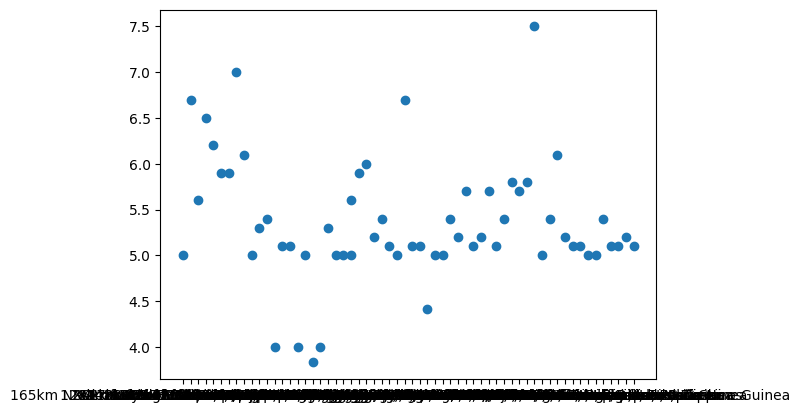

In [25]:
# Data taken from sql
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Conectar a la base de datos SQLite
conn = sqlite3.connect('quakes.db') ## Descargar el quakes.db de https://github.com/LuisAngelOlveraOlvera/Hands-On-Data-Analysis-with-Pandas-Second-Edition/blob/main/quakes.db

# Consultar la tabla tsunamis y cargar los datos en un DataFrame
df = pd.read_sql_query("SELECT * FROM tsunamis", conn)

# Mostrar los primeros registros del DataFrame
print('\n', df.head())
print('\nEl tamaño de lugares es de: ',len(df.place))

# Graficar los datos
plt.scatter(df['place'], df['mag'])
plt.show()


# Cerrar la conexión a la base de datos
conn.close()


In [34]:
# Import data from API
import datetime as dt
import requests
import pandas as pd

# Calculate yesterday's date
yesterday = dt.date.today() - dt.timedelta(days=1)

# Construct the start and end dates for the query (30 days before yesterday)
start_date = yesterday - dt.timedelta(days=30)
end_date = yesterday

# Construct the payload for the API request
payload = {
    "format": 'geojson',
    'starttime': start_date.isoformat(),  # Convert dates to ISO format
    'endtime': end_date.isoformat()
}

# Send request to USGS Earthquake API
response = requests.get("https://earthquake.usgs.gov/fdsnws/event/1/query", params=payload)

# Check if request was successful
if response.status_code == 200:
    # Parse JSON response
    data = response.json()

    # Convert JSON data to DataFrame
    df = pd.DataFrame(data['features'])

    # Display DataFrame
    print(df.head())
else:
    print("Error:", response.status_code)





      type                                         properties  \
0  Feature  {'mag': 2.18, 'place': '7 km NNW of Lake Pills...   
1  Feature  {'mag': 1.2, 'place': '66 km NNE of Petersvill...   
2  Feature  {'mag': 1.9, 'place': '6 km ESE of Califon, Ne...   
3  Feature  {'mag': 1.96, 'place': '10 km SW of Niland, CA...   
4  Feature  {'mag': 2.23, 'place': '2 km WNW of Pāhala, Ha...   

                                            geometry            id  
0  {'type': 'Point', 'coordinates': [-122.9906667...    nc74043561  
1  {'type': 'Point', 'coordinates': [-150.4949, 6...  ak0245ki20y2  
2  {'type': 'Point', 'coordinates': [-74.7597, 40...    us6000mvcr  
3  {'type': 'Point', 'coordinates': [-115.6066667...    ci40734336  
4  {'type': 'Point', 'coordinates': [-155.4998321...    hv74201882  


In [39]:
# Examining the data
df = pd.read_csv('https://github.com/LuisAngelOlveraOlvera/Hands-On-Data-Analysis-with-Pandas-Second-Edition/blob/main/earthquakes.csv?raw=True') # agregar ?raw=True
df
print("-----------------------\ndf",df)
print("-----------------------\ndf.dtypes",df.dtypes)
print("-----------------------\ndf.values",df.values)
print("-----------------------\ndf.columns",df.columns)
print("-----------------------\ndf.index",df.index)
print("-----------------------\ndf.index",df.shape)
print("-----------------------\ndf.empty",df.empty)
print("-----------------------\ndf.describe",df.describe())
print("-----------------------\ndf.head",df.head())
print("-----------------------\ndf.tail",df.tail(2))
print("-----------------------\ndf.Info",df.info())

-----------------------
df      alert  cdi        code  \
0      NaN  NaN    37389218   
1      NaN  NaN    37389202   
2      NaN  4.4    37389194   
3      NaN  NaN    37389186   
4      NaN  NaN    73096941   
...    ...  ...         ...   
9327   NaN  NaN    73086771   
9328   NaN  NaN    38063967   
9329   NaN  NaN  2018261000   
9330   NaN  NaN    38063959   
9331   NaN  NaN    38063935   

                                                 detail      dmin  felt  \
0     https://earthquake.usgs.gov/fdsnws/event/1/que...  0.008693   NaN   
1     https://earthquake.usgs.gov/fdsnws/event/1/que...  0.020030   NaN   
2     https://earthquake.usgs.gov/fdsnws/event/1/que...  0.021370  28.0   
3     https://earthquake.usgs.gov/fdsnws/event/1/que...  0.026180   NaN   
4     https://earthquake.usgs.gov/fdsnws/event/1/que...  0.077990   NaN   
...                                                 ...       ...   ...   
9327  https://earthquake.usgs.gov/fdsnws/event/1/que...  0.018060   NaN   


In [40]:
# Describing data
df.describe()

,cdi,dmin,felt,gap,mag,mmi,nst,rms,sig,time,tsunami,tz,updated
count,329.000000,6139.000000,329.000000,6164.000000,9331.000000,93.000000,5364.000000,9332.000000,9332.000000,9.332000e+03,9332.000000,9331.000000,9.332000e+03
mean,2.754711,0.544925,12.310030,121.506588,1.497345,3.651398,19.053878,0.362122,56.899914,1.538284e+12,0.006537,-451.990140,1.538537e+12
std,1.010637,2.214305,48.954944,72.962363,1.203347,1.790523,15.492315,0.317784,91.872163,6.080306e+08,0.080589,231.752571,6.564135e+08
min,0.000000,0.000648,0.000000,12.000000,-1.260000,0.000000,0.000000,0.000000,0.000000,1.537229e+12,0.000000,-720.000000,1.537230e+12
25%,2.000000,0.020425,1.000000,66.142500,0.720000,2.680000,8.000000,0.119675,8.000000,1.537793e+12,0.000000,-540.000000,1.537996e+12
50%,2.700000,0.059050,2.000000,105.000000,1.300000,3.720000,15.000000,0.210000,26.000000,1.538245e+12,0.000000,-480.000000,1.538621e+12
75%,3.300000,0.177250,5.000000,159.000000,1.900000,4.570000,25.000000,0.590000,56.000000,1.538766e+12,0.000000,-480.000000,1.539110e+12
max,8.400000,53.737000,580.000000,355.910000,7.500000,9.120000,172.000000,1.910000,2015.000000,1.539475e+12,1.000000,720.000000,1.539537e+12


In [43]:
# Modifying percentiles
df.describe(percentiles=[0.05, 0.95])

,cdi,dmin,felt,gap,mag,mmi,nst,rms,sig,time,tsunami,tz,updated
count,329.000000,6139.000000,329.000000,6164.000000,9331.000000,93.000000,5364.000000,9332.000000,9332.000000,9.332000e+03,9332.000000,9331.000000,9.332000e+03
mean,2.754711,0.544925,12.310030,121.506588,1.497345,3.651398,19.053878,0.362122,56.899914,1.538284e+12,0.006537,-451.990140,1.538537e+12
std,1.010637,2.214305,48.954944,72.962363,1.203347,1.790523,15.492315,0.317784,91.872163,6.080306e+08,0.080589,231.752571,6.564135e+08
min,0.000000,0.000648,0.000000,12.000000,-1.260000,0.000000,0.000000,0.000000,0.000000,1.537229e+12,0.000000,-720.000000,1.537230e+12
5%,2.000000,0.005491,1.000000,35.000000,-0.040000,0.000000,4.000000,0.030000,0.000000,1.537344e+12,0.000000,-600.000000,1.537387e+12
50%,2.700000,0.059050,2.000000,105.000000,1.300000,3.720000,15.000000,0.210000,26.000000,1.538245e+12,0.000000,-480.000000,1.538621e+12
95%,4.300000,2.678900,40.200000,276.000000,4.400000,6.380000,49.000000,0.960000,298.000000,1.539319e+12,0.000000,-60.000000,1.539400e+12
max,8.400000,53.737000,580.000000,355.910000,7.500000,9.120000,172.000000,1.910000,2015.000000,1.539475e+12,1.000000,720.000000,1.539537e+12


In [47]:
# Describe DataFrame including object data types
# When describing non-numeric data, we still get the count of non-null occurrences
df.describe(include=object)



,alert,code,detail,ids,magType,net,place,sources,status,title,type,types,url
count,59,9332,9332,9332,9331,9332,9332,9332,9332,9332,9332,9332,9332
unique,2,9332,9332,9332,10,14,5433,52,2,7807,5,42,9332
top,green,37389218,https://earthquake.usgs.gov/fdsnws/event/1/que...,",ci37389218,",ml,ak,"10km NE of Aguanga, CA",",ak,",reviewed,"M 0.4 - 10km NE of Aguanga, CA",earthquake,",geoserve,origin,phase-data,",https://earthquake.usgs.gov/earthquakes/eventp...
freq,58,1,1,1,6803,3166,306,2981,7797,55,9081,5301,1


In [56]:
df.alert.unique()
df.alert.value_counts()

alert
green    58
red       1
Name: count, dtype: int64

In [72]:
# Grabbing subsets of the data
print('\ndf.mag.count-------------\n',df.mag.count())
print('\ndf.mag.nunique\n-------------\n',df.mag.nunique())
print('\ndf.mag.sum\n-------------\n',df.mag.sum())
print('\ndf.mag.mean\n-------------\n',df.mag.mean())
print('\ndf.mag.median\n-------------\n',df.mag.median())
print('\ndf.mag.std\n-------------\n',df.mag.std)
print('\ndf.mag.min\n-------------\n',df.mag.min())
print('\ndf.mag.max\n-------------\n',df.mag.max())
print('\ndf.mag.idxmax\n-------------\n',df.mag.idxmax())
print('\ndf.mag.idxmin\n-------------\n',df.mag.idxmin())
print('\ndf.mag.quantile\n-------------\n',df.mag.quantile(0.5))
print('\ndf.mag.quantile(0.95)\n-------------\n',df.mag.quantile(0.95))



df.mag.count-------------
 9331

df.mag.nunique
-------------
 477

df.mag.sum
-------------
 13971.73

df.mag.mean
-------------
 1.4973454077805166

df.mag.median
-------------
 1.3

df.mag.std
-------------
 <bound method NDFrame._add_numeric_operations.<locals>.std of 0       1.35
1       1.29
2       3.42
3       0.44
4       2.16
        ... 
9327    0.62
9328    1.00
9329    2.40
9330    1.10
9331    0.66
Name: mag, Length: 9332, dtype: float64>

df.mag.min
-------------
 -1.26

df.mag.max
-------------
 7.5

df.mag.idxmax
-------------
 5263

df.mag.idxmin
-------------
 2409

df.mag.quantile
-------------
 1.3

df.mag.quantile(0.95)
-------------
 4.4


In [73]:
df[['mag', 'title']]

,mag,title
0,1.35,"M 1.4 - 9km NE of Aguanga, CA"
1,1.29,"M 1.3 - 9km NE of Aguanga, CA"
2,3.42,"M 3.4 - 8km NE of Aguanga, CA"
3,0.44,"M 0.4 - 9km NE of Aguanga, CA"
4,2.16,"M 2.2 - 10km NW of Avenal, CA"
...,...,...
9327,0.62,"M 0.6 - 9km ENE of Mammoth Lakes, CA"
9328,1.00,"M 1.0 - 3km W of Julian, CA"
9329,2.40,"M 2.4 - 35km NNE of Hatillo, Puerto Rico"
9330,1.10,"M 1.1 - 9km NE of Aguanga, CA"


In [74]:
df[
    ['title', 'time']
    + [ col for col in df.columns if col.startswith('mag')]
]

,title,time,mag,magType
0,"M 1.4 - 9km NE of Aguanga, CA",1539475168010,1.35,ml
1,"M 1.3 - 9km NE of Aguanga, CA",1539475129610,1.29,ml
2,"M 3.4 - 8km NE of Aguanga, CA",1539475062610,3.42,ml
3,"M 0.4 - 9km NE of Aguanga, CA",1539474978070,0.44,ml
4,"M 2.2 - 10km NW of Avenal, CA",1539474716050,2.16,md
...,...,...,...,...
9327,"M 0.6 - 9km ENE of Mammoth Lakes, CA",1537230228060,0.62,md
9328,"M 1.0 - 3km W of Julian, CA",1537230135130,1.00,ml
9329,"M 2.4 - 35km NNE of Hatillo, Puerto Rico",1537229908180,2.40,md
9330,"M 1.1 - 9km NE of Aguanga, CA",1537229545350,1.10,ml


In [76]:
# Slicing
df[100:103]

,alert,cdi,code,detail,dmin,felt,gap,ids,mag,magType,...,sources,status,time,title,tsunami,type,types,tz,updated,url
100,NaN,NaN,20280310,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,",ak20280310,",1.20,ml,...,",ak,",automatic,1539435449480,"M 1.2 - 25km NW of Ester, Alaska",0,earthquake,",geoserve,origin,",-540.0,1539443551010,https://earthquake.usgs.gov/earthquakes/eventp...
101,NaN,NaN,73096756,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.01355,NaN,185.0,",nc73096756,",0.59,md,...,",nc,",automatic,1539435391320,"M 0.6 - 8km ESE of Mammoth Lakes, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,scit...",-480.0,1539439802162,https://earthquake.usgs.gov/earthquakes/eventp...
102,NaN,NaN,37388730,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.02987,NaN,39.0,",ci37388730,",1.33,ml,...,",ci,",automatic,1539435293090,"M 1.3 - 8km ENE of Aguanga, CA",0,earthquake,",focal-mechanism,geoserve,nearby-cities,origin...",-480.0,1539435940470,https://earthquake.usgs.gov/earthquakes/eventp...


In [77]:
df[['title', 'time']][100:103]

,title,time
100,"M 1.2 - 25km NW of Ester, Alaska",1539435449480
101,"M 0.6 - 8km ESE of Mammoth Lakes, CA",1539435391320
102,"M 1.3 - 8km ENE of Aguanga, CA",1539435293090


In [78]:
df[100:103][['title', 'time']].equals(df[['title', 'time']][100:103])

True

In [89]:
# Indexing
import pandas as pd

# Create a sample DataFrame
# Create a sample DataFrame
data = {'A': [1, 2, 3, 4, 5],
        'B': [6, 7, 8, 9, 10],
        'C': ['a', 'b', 'c', 'd', 'e']}
df = pd.DataFrame(data)

print(df)



   A   B  C
0  1   6  a
1  2   7  b
2  3   8  c
3  4   9  d
4  5  10  e


In [91]:
# Using df.loc for label-based indexing
print("Using df.loc:")
print('\ndf.loc[0]\n-------------\n',df.loc[0])           # Select the row with index label 0
print('\ndf.loc[[1, 3]\n-------------\n',df.loc[[1, 3]])      # Select multiple rows with index labels 1 and 3
print('\ndf.loc[[1:3]\n-------------\n',df.loc[1:3])         # Select rows with index labels from 1 to 3 inclusively
print('\ndf.loc[:, A]\n-------------\n',df.loc[:, 'A'])      # Select the column with column label 'A'
print('\ndf.loc[:, [A , C]\n-------------\n',df.loc[:, ['A', 'C']])  # Select multiple columns with column labels 'A' and 'C'
print('\ndf.loc[:, [A : C]\n-------------\n',df.loc[:, 'A':'C'])     # Select columns with column labels from 'A' to 'C' inclusively

print("Using df.iloc:")
print('\ndf.iloc[0]\n-------------\n', df.iloc[0])           # Select the row with index position 0
print('\ndf.iloc[[1, 3]]\n-------------\n', df.iloc[[1, 3]])      # Select multiple rows with index positions 1 and 3
print('\ndf.iloc[1:3]\n-------------\n', df.iloc[1:3])         # Select rows with index positions from 1 to 2 inclusively
print('\ndf.iloc[:, 0]\n-------------\n', df.iloc[:, 0])      # Select the first column
print('\ndf.iloc[:, [0, 2]]\n-------------\n', df.iloc[:, [0, 2]])  # Select multiple columns with column positions 0 and 2
print('\ndf.iloc[:, 0:3]\n-------------\n', df.iloc[:, 0:3])     # Select columns with column positions from 0 to 2 inclusively


Using df.loc:

df.loc[0]
-------------
 A    1
B    6
C    a
Name: 0, dtype: object

df.loc[[1, 3]
-------------
    A  B  C
1  2  7  b
3  4  9  d

df.loc[[1:3]
-------------
    A  B  C
1  2  7  b
2  3  8  c
3  4  9  d

df.loc[:, A]
-------------
 0    1
1    2
2    3
3    4
4    5
Name: A, dtype: int64

df.loc[:, [A , C]
-------------
    A  C
0  1  a
1  2  b
2  3  c
3  4  d
4  5  e

df.loc[:, [A : C]
-------------
    A   B  C
0  1   6  a
1  2   7  b
2  3   8  c
3  4   9  d
4  5  10  e
Using df.iloc:

df.iloc[0]
-------------
 A    1
B    6
C    a
Name: 0, dtype: object

df.iloc[[1, 3]]
-------------
    A  B  C
1  2  7  b
3  4  9  d

df.iloc[1:3]
-------------
    A  B  C
1  2  7  b
2  3  8  c

df.iloc[:, 0]
-------------
 0    1
1    2
2    3
3    4
4    5
Name: A, dtype: int64

df.iloc[:, [0, 2]]
-------------
    A  C
0  1  a
1  2  b
2  3  c
3  4  d
4  5  e

df.iloc[:, 0:3]
-------------
    A   B  C
0  1   6  a
1  2   7  b
2  3   8  c
3  4   9  d
4  5  10  e


In [101]:
# Filtering
df = pd.read_csv('https://github.com/LuisAngelOlveraOlvera/Hands-On-Data-Analysis-with-Pandas-Second-Edition/blob/main/earthquakes.csv?raw=True') # agregar ?raw=True

print('\n--------\n',df.mag > 2)
print('\n--------\n',df[df.mag >= 7.0])
print('\n--------\n',df.loc[df.mag >= 7.0,['alert', 'mag', 'magType', 'title', 'tsunami', 'type']])


--------
 0       False
1       False
2        True
3       False
4        True
        ...  
9327    False
9328    False
9329     True
9330    False
9331    False
Name: mag, Length: 9332, dtype: bool

--------
       alert  cdi      code                                             detail  \
837   green  4.1  1000haa3  https://earthquake.usgs.gov/fdsnws/event/1/que...   
5263    red  8.4  1000h3p4  https://earthquake.usgs.gov/fdsnws/event/1/que...   

       dmin  felt   gap                                 ids  mag magType  ...  \
837   1.763   3.0  14.0  ,us1000haa3,pt18283003,at00pgehsk,  7.0     mww  ...   
5263  1.589  18.0  27.0             ,us1000h3p4,us1000h4p4,  7.5     mww  ...   

         sources    status           time  \
837   ,us,pt,at,  reviewed  1539204500290   
5263     ,us,us,  reviewed  1538128963480   

                                           title  tsunami        type  \
837   M 7.0 - 117km E of Kimbe, Papua New Guinea        1  earthquake   
5263           M 

In [106]:
# Adding removing data
df_to_modify = df.copy()
df_to_modify = usecols=['time', 'title', 'place', 'magType', 'mag', 'alert', 'tsunami']
print(df_to_modify)

['time', 'title', 'place', 'magType', 'mag', 'alert', 'tsunami']


In [108]:
# Creating new data
df['soruce'] = 'USGS API'
df.head()

,alert,cdi,code,detail,dmin,felt,gap,ids,mag,magType,...,status,time,title,tsunami,type,types,tz,updated,url,soruce
0,NaN,NaN,37389218,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.008693,NaN,85.0,",ci37389218,",1.35,ml,...,automatic,1539475168010,"M 1.4 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0,1539475395144,https://earthquake.usgs.gov/earthquakes/eventp...,USGS API
1,NaN,NaN,37389202,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.020030,NaN,79.0,",ci37389202,",1.29,ml,...,automatic,1539475129610,"M 1.3 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0,1539475253925,https://earthquake.usgs.gov/earthquakes/eventp...,USGS API
2,NaN,4.4,37389194,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.021370,28.0,21.0,",ci37389194,",3.42,ml,...,automatic,1539475062610,"M 3.4 - 8km NE of Aguanga, CA",0,earthquake,",dyfi,focal-mechanism,geoserve,nearby-cities,o...",-480.0,1539536756176,https://earthquake.usgs.gov/earthquakes/eventp...,USGS API
3,NaN,NaN,37389186,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.026180,NaN,39.0,",ci37389186,",0.44,ml,...,automatic,1539474978070,"M 0.4 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0,1539475196167,https://earthquake.usgs.gov/earthquakes/eventp...,USGS API
4,NaN,NaN,73096941,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.077990,NaN,192.0,",nc73096941,",2.16,md,...,automatic,1539474716050,"M 2.2 - 10km NW of Avenal, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,scit...",-480.0,1539477547926,https://earthquake.usgs.gov/earthquakes/eventp...,USGS API


In [109]:
df['mag_negative'] = df.mag < 0
df.head()

,alert,cdi,code,detail,dmin,felt,gap,ids,mag,magType,...,time,title,tsunami,type,types,tz,updated,url,soruce,mag_negative
0,NaN,NaN,37389218,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.008693,NaN,85.0,",ci37389218,",1.35,ml,...,1539475168010,"M 1.4 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0,1539475395144,https://earthquake.usgs.gov/earthquakes/eventp...,USGS API,False
1,NaN,NaN,37389202,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.020030,NaN,79.0,",ci37389202,",1.29,ml,...,1539475129610,"M 1.3 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0,1539475253925,https://earthquake.usgs.gov/earthquakes/eventp...,USGS API,False
2,NaN,4.4,37389194,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.021370,28.0,21.0,",ci37389194,",3.42,ml,...,1539475062610,"M 3.4 - 8km NE of Aguanga, CA",0,earthquake,",dyfi,focal-mechanism,geoserve,nearby-cities,o...",-480.0,1539536756176,https://earthquake.usgs.gov/earthquakes/eventp...,USGS API,False
3,NaN,NaN,37389186,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.026180,NaN,39.0,",ci37389186,",0.44,ml,...,1539474978070,"M 0.4 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0,1539475196167,https://earthquake.usgs.gov/earthquakes/eventp...,USGS API,False
4,NaN,NaN,73096941,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.077990,NaN,192.0,",nc73096941,",2.16,md,...,1539474716050,"M 2.2 - 10km NW of Avenal, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,scit...",-480.0,1539477547926,https://earthquake.usgs.gov/earthquakes/eventp...,USGS API,False
